In [46]:
import numpy as np
import pandas as pd

# 1. 데이터 적재
## sepal: 꽃받침, petal: 꽃잎 

In [47]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [48]:
print"iris_dataset의 키:\n", iris_dataset.keys()

iris_dataset의 키:
['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']


In [49]:
print iris_dataset['DESCR'][:193] + "\n..."

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [50]:
print "타겟의 이름:",iris_dataset["target_names"]

타겟의 이름: ['setosa' 'versicolor' 'virginica']


In [51]:
print "특성의 이름:",iris_dataset["feature_names"]

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [52]:
print "data의 타입:",type(iris_dataset['data'])

data의 타입: <type 'numpy.ndarray'>


In [53]:
print "data의 크기:", iris_dataset['data'].shape

data의 크기: (150, 4)


In [54]:
print "data의 처음 다섯 행 :\n", iris_dataset['data'][:5]

data의 처음 다섯 행 :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [55]:
print "target의 타입: ", type(iris_dataset['target'])

target의 타입:  <type 'numpy.ndarray'>


In [56]:
print "target의 크기 : ",  iris_dataset['target'].shape

target의 크기 :  (150,)


In [57]:
print "타깃:\n", iris_dataset['target']

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. 성과측정 : 훈련 데이터와 테스트 데이터

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    random_state=0)

In [59]:
print "X_train 크기", X_train.shape
print "y_train 크기", y_train.shape

X_train 크기 (112, 4)
y_train 크기 (112,)


In [60]:
print "X_test 크기", X_test.shape
print "y_test 크기", y_test.shape

X_test 크기 (38, 4)
y_test 크기 (38,)


# 3. 데이터 살펴보기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2e451b350>,
      dtype=object)

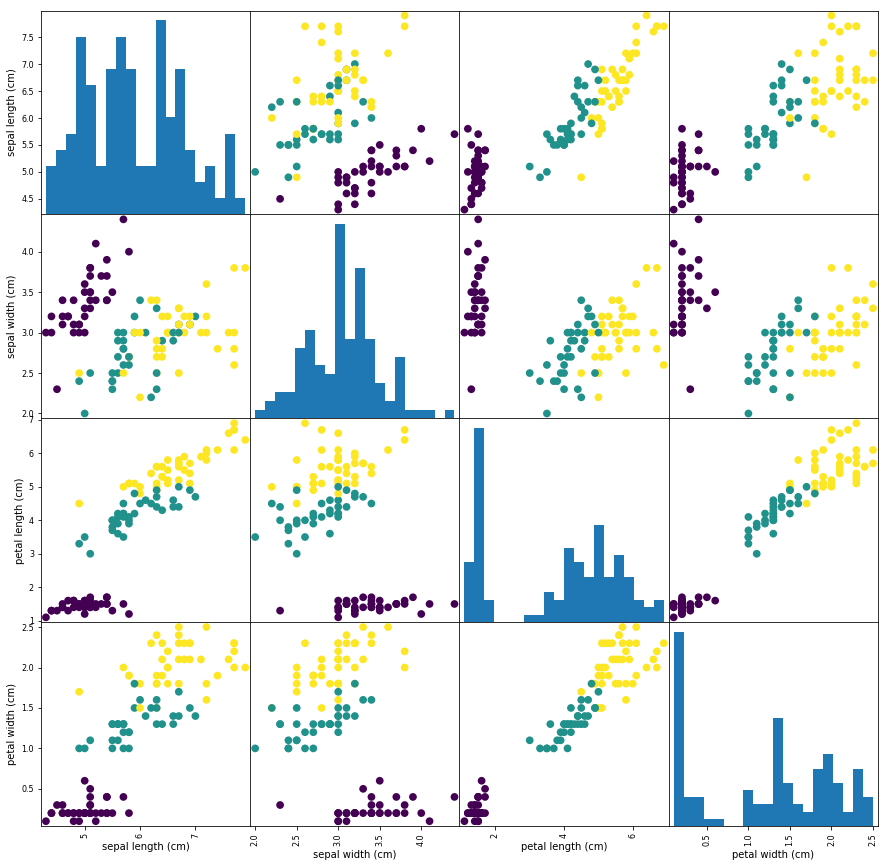

In [61]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                           hist_kwds={'bins':20}, s=60, alpha=8)

# 4. 첫 번째 머신러닝 모델 : k-최근접 이웃 알고리즘

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# 5. 예측하기 

In [65]:
X_new = np.array([[5,2.9,1,0.2]])
print "X_new.shape:",X_new.shape

X_new.shape: (1, 4)


In [66]:
prediction = knn.predict(X_new)
print "예측:", prediction
print "예측한 타깃의 이름:", iris_dataset['target_names'][prediction]

예측: [0]
예측한 타깃의 이름: ['setosa']


# 6. 모델 평가하기

In [69]:
y_pred = knn.predict(X_test)
print "테스트에 대한 예측값:\n", y_pred

테스트에 대한 예측값:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [70]:
print "테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_test))

테스트 세트의 정확도 : 0.97
